In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm, vhmm
import joblib
import seaborn as sns

# Import data

Chargement des corrdonnées du museau 

In [2]:
X_head = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/head_coords.csv",  names=['Gauche_head', 'Haut_head', 'Largeur_head', 'Longeur_head'])
X_snout = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/snout_coords.csv",  names=['Gauche_snout', 'Haut_snout', 'Largeur_snout', 'Longeur_snout'])
X_cow = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/cow_coords.csv",  names=['Gauche_cow', 'Haut_cow', 'Largeur_cow', 'Longeur_cow'])

X = np.concatenate([X_head, X_snout, X_cow], axis=1)
df = pd.DataFrame(X)
df.to_csv("../data/3Boxes_coords.csv")

lengths = [len(X_head), len(X_snout), len(X_cow)]

lengths
len(X)
X.shape
df



,0,1,2,3,4,5,6,7,8,9,10,11
0,0.171130,0.391502,0.516889,0.663207,0.182095,0.564310,0.168614,0.233524,0.166457,0.008873,1.001398,1.048313
1,0.172891,0.411942,0.520052,0.637912,0.183028,0.535635,0.172195,0.265240,0.168241,0.015035,0.992619,1.041969
2,0.174267,0.428778,0.522600,0.617213,0.183667,0.513194,0.175082,0.289693,0.169740,0.020408,0.984892,1.036530
3,0.175295,0.442282,0.524578,0.600754,0.184043,0.496454,0.177336,0.307510,0.170978,0.025045,0.978149,1.031934
4,0.176014,0.452724,0.526035,0.588182,0.184191,0.484884,0.179015,0.319314,0.171978,0.028997,0.972324,1.028118
...,...,...,...,...,...,...,...,...,...,...,...,...
1370,0.223776,0.727776,0.387667,0.667878,0.225228,0.723106,0.152929,0.182148,0.236992,0.083251,0.545055,1.410483
1371,0.218780,0.710023,0.390090,0.669977,0.224485,0.714644,0.142189,0.174504,0.220609,0.078841,0.564080,1.413386
1372,0.216704,0.692295,0.391427,0.670888,0.227563,0.707101,0.129164,0.165155,0.202257,0.074052,0.587869,1.416906
1373,0.217767,0.674704,0.391580,0.670472,0.234720,0.700602,0.113701,0.153982,0.181830,0.068883,0.616711,1.421086


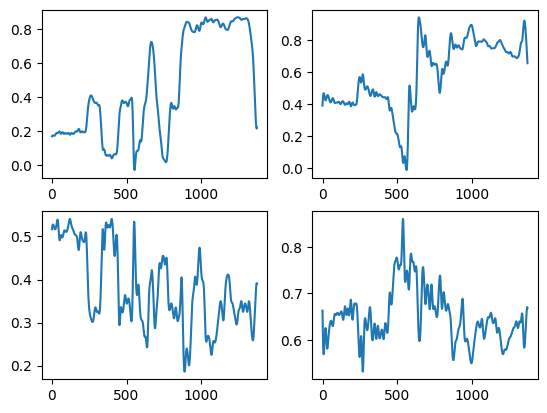

In [3]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X)) , X[0:,0])
plt.subplot(2,2,2)
plt.plot(range(0,len(X)) ,X[0:,1])
plt.subplot(2,2,3)
plt.plot(range(0,len(X)) ,X[0:,2])
plt.subplot(2,2,4)
plt.plot(range(0,len(X)) ,X[0:,3])


# Train model

In [4]:
em_scores = list()
vi_scores = list()
em_models = list()
vi_models = list()
for n_components in range(2, 5):
    for idx in range(10):
        
        em_model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=50)
        # variational inference
        vi_model = vhmm.VariationalGaussianHMM(n_components=n_components, random_state=idx, covariance_type='full', n_iter=50)
        em_model.fit(X)
        vi_model.fit(X)
        em_models.append(em_model)
        vi_models.append(vi_model)
        em_scores.append(em_model.score(X))
        vi_scores.append(vi_model.score(X))
        ll = em_model.monitor_.history[-1]
        """ print(f"Training EM({n_components}) Final Log Likelihood={ll} "
              f"Iterations={len(vi_model.monitor_.history)} ") """
        # print(f'Converged: {em_model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
em_model = em_models[np.argmax(em_scores)]
vi_model = vi_models[np.argmax(vi_scores)]
# print(f'The best model had a score of {max(scores)} and 'f'{em_model.n_components} components')


em_Z = em_model.predict(X)
vi_Z = vi_model.predict(X)
    
joblib.dump(em_model, 'models/EM/hmm_model_head_snout_cow.pkl')
joblib.dump(vi_model, 'models/Vi/hmm_model_head_snout_cow.pkl')

Model is not converging.  Current: 34213.52856639877 is not greater than 34213.52927291625. Delta is -0.0007065174795570783
Model is not converging.  Current: 34213.52856392839 is not greater than 34213.52927517411. Delta is -0.0007112457169569097
Model is not converging.  Current: 34213.52860399007 is not greater than 34213.5292946429. Delta is -0.0006906528360559605
Model is not converging.  Current: 34213.52856582103 is not greater than 34213.529273454835. Delta is -0.0007076338079059497
Model is not converging.  Current: 34213.52856596989 is not greater than 34213.529273315275. Delta is -0.0007073453816701658
Model is not converging.  Current: 34213.52856352101 is not greater than 34213.52927553655. Delta is -0.0007120155423763208
Model is not converging.  Current: 34213.52857077542 is not greater than 34213.52926866897. Delta is -0.0006978935489314608
Model is not converging.  Current: 37267.90088478697 is not greater than 37268.059930988115. Delta is -0.15904620114451973
Model is

['models/Vi/hmm_model_head_snout_cow.pkl']

In [5]:
print(em_model.means_)
print(len(em_Z)/30)
print(vi_model.means_)
#print(model.covars_)

[[0.2104185  0.43870233 0.45757758 0.63810412 0.22885299 0.48598422
  0.17769854 0.25444543 0.16972138 0.03955463 0.94785704 1.03262305]
 [0.82625185 0.77413062 0.32771746 0.61905071 1.01084898 0.77651857
  0.13118613 0.16519845 0.29539943 0.08380863 0.84424502 1.3704436 ]
 [0.30261917 0.60525505 0.35156137 0.69079569 0.3552461  0.59684042
  0.15808854 0.18911927 0.18617722 0.08609255 0.69492792 1.36445775]
 [0.36407487 0.15449333 0.3453542  0.78109038 0.45466059 0.14401011
  0.19471698 0.19128813 0.21195759 0.0321642  0.8623027  0.91792085]]
45.833333333333336
[[0.15712231 0.42986053 0.50516705 0.63696224 0.16451173 0.48834298
  0.17147005 0.25400728 0.15715445 0.03885318 0.96247466 1.02813516]
 [0.82157333 0.77525571 0.32836486 0.62020116 1.00664055 0.77762978
  0.13131975 0.16621822 0.29667951 0.0840244  0.84079599 1.37118553]
 [0.28680513 0.57594528 0.35177548 0.69757622 0.33152264 0.56738045
  0.16043446 0.18909853 0.17859949 0.08306473 0.69848733 1.35084247]
 [0.36131403 0.387406

Text(0.5, 0.98, 'Snout and Head and cow Coordinates EM')

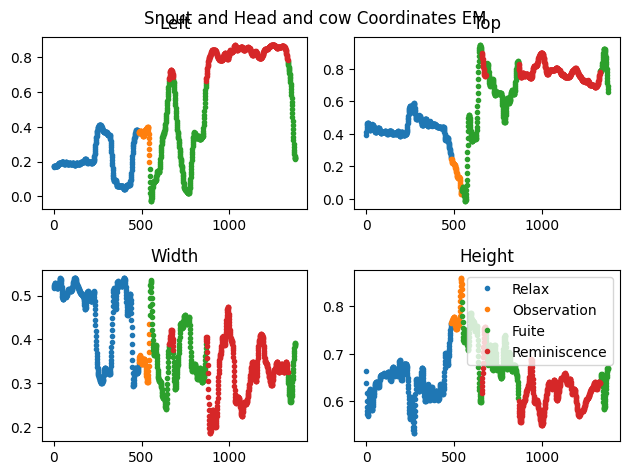

In [6]:
em_states = pd.unique(em_Z)
state_names = ['Relax', 'Observation', 'Fuite', 'Reminiscence']

plt.subplot(2,2,1)
for i in em_states:
    #print(len(X))
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,0][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
plt.subplot(2,2,2)
for i in em_states:
    #print(len(X[1:,0]))
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,1][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Top")
plt.subplot(2,2,3)
for i in em_states:
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,2][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Width")
plt.subplot(2,2,4)
for i in em_states:
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,3][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Height")

plt.tight_layout()
plt.legend(labels=state_names, loc="upper right", ncol=1)
plt.suptitle('Snout and Head and cow Coordinates EM')
# rajouter les etiquettes 

Text(0.5, 0.98, 'Snout and Head and cow Coordinates VI')

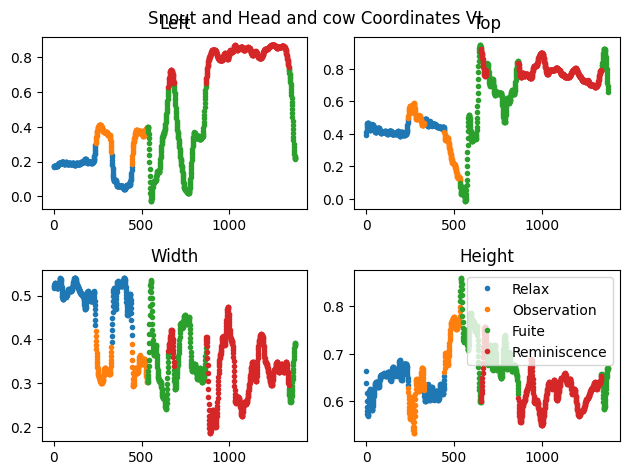

In [7]:
vi_states = pd.unique(vi_Z)

plt.subplot(2,2,1)
for i in vi_states:
    #print(len(X))
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,0][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Left')
plt.subplot(2,2,2)
for i in vi_states:
    #print(len(X[1:,0]))
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,1][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Top')
plt.subplot(2,2,3)
for i in vi_states:
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,2][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Width')
plt.subplot(2,2,4)
for i in vi_states:
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,3][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Height')

plt.tight_layout()
plt.legend(labels=state_names, loc="upper right", ncol=1)
plt.suptitle('Snout and Head and cow Coordinates VI')

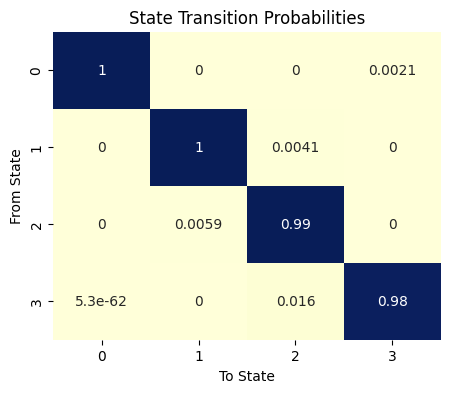

In [8]:
transition_matrix = em_model.transmat_
plt.figure(figsize=(5, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

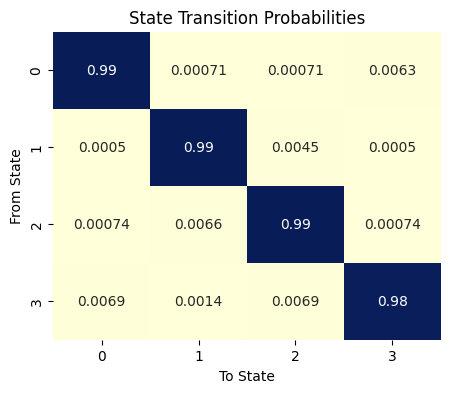

In [9]:
transition_matrix = vi_model.transmat_
plt.figure(figsize=(5, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

In [10]:
predicted_state = em_model.predict_proba(X)
predicted_state
df = pd.DataFrame(predicted_state)
df.to_csv("../INF889E Project/Trained data/EM/predict_3boxes.csv")



In [11]:


df = pd.DataFrame({'original_state': em_Z})
df.to_csv("../INF889E Project/Trained data/EM/head_Snout_cow_coords_hmmstates.csv")
df=pd.DataFrame({'states':vi_Z})
df.to_csv("../INF889E Project/Trained data/VI/head_Snout_cow_coords_hmmstates.csv")